<a href="https://colab.research.google.com/github/rrizwan98/Lungs-Cancer-Dedection/blob/main/Lungs_Cancer_X_ray_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from zipfile import ZipFile
file_name='/content/drive/MyDrive/lungs X_Ray.zip'
with ZipFile (file_name,'r')as zip:
  zip.extractall()
  print('raza')

raza


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout, GlobalAveragePooling2D

from tensorflow import keras
layers = keras.layers
models = keras.models

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255.,zoom_range = 0.2)
val_datagen = ImageDataGenerator(rescale = 1./255.,)
test_datagen = ImageDataGenerator(rescale = 1./255.,)
train_generator = train_datagen.flow_from_directory('/content/chest_xray/train', batch_size=20, class_mode='binary', target_size = (220, 220))
validation_generator = val_datagen.flow_from_directory('/content/chest_xray/val', batch_size=20, class_mode = 'binary', target_size=(220, 220))
test_generator = test_datagen.flow_from_directory('/content/chest_xray/test',shuffle=False, batch_size=20, class_mode = 'binary', target_size=(220, 220))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
train_generator.image_shape, train_generator.n, train_generator.batch_size

((220, 220, 3), 5216, 20)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(220,220,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 107, 107, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 128)       1

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator)

Epoch 1/30
100/100 [==============================] - 46s 452ms/step - loss: 0.1769 - acc: 0.9270 - val_loss: 0.6603 - val_acc: 0.6875
Epoch 2/30
100/100 [==============================] - 45s 452ms/step - loss: 0.1653 - acc: 0.9325 - val_loss: 0.5473 - val_acc: 0.7500
Epoch 3/30
100/100 [==============================] - 45s 453ms/step - loss: 0.1643 - acc: 0.9449 - val_loss: 1.9456 - val_acc: 0.6250
Epoch 4/30
100/100 [==============================] - 46s 456ms/step - loss: 0.1643 - acc: 0.9400 - val_loss: 0.5419 - val_acc: 0.8125
Epoch 5/30
100/100 [==============================] - 46s 459ms/step - loss: 0.1547 - acc: 0.9395 - val_loss: 0.5916 - val_acc: 0.8125
Epoch 6/30
100/100 [==============================] - 46s 460ms/step - loss: 0.1395 - acc: 0.9485 - val_loss: 0.5831 - val_acc: 0.8125
Epoch 7/30
100/100 [==============================] - 46s 458ms/step - loss: 0.1479 - acc: 0.9440 - val_loss: 0.6711 - val_acc: 0.6875
Epoch 8/30
100/100 [==============================] - 4

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


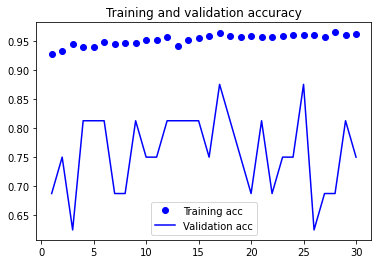

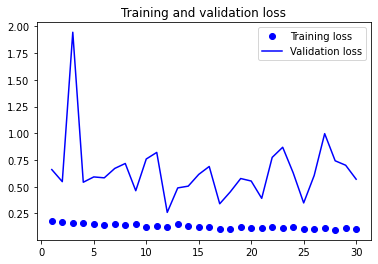

In [ ]:
accuracy = history.history['acc']
val_accuracy  = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### **Data Augmentation**

In [ ]:
A_model = models.Sequential()
A_model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
A_model.add(layers.MaxPooling2D((2, 2)))
A_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
A_model.add(layers.MaxPooling2D((2, 2)))
A_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
A_model.add(layers.MaxPooling2D((2, 2)))
A_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
A_model.add(layers.MaxPooling2D((2, 2)))
A_model.add(layers.Flatten())
A_model.add(layers.Dropout(0.5))
A_model.add(layers.Dense(512, activation='relu'))
A_model.add(layers.Dense(1, activation='sigmoid'))

A_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/chest_xray/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory('/content/chest_xray/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import optimizers
A_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [ ]:
A_history = A_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 53s 518ms/step - loss: 0.5774 - acc: 0.7325 - val_loss: 1.4031 - val_acc: 0.5000
Epoch 2/20
100/100 [==============================] - 51s 505ms/step - loss: 0.4679 - acc: 0.7578 - val_loss: 0.7167 - val_acc: 0.5625
Epoch 3/20
100/100 [==============================] - 51s 509ms/step - loss: 0.4407 - acc: 0.7603 - val_loss: 0.5783 - val_acc: 0.8750
Epoch 4/20
100/100 [==============================] - 51s 507ms/step - loss: 0.4444 - acc: 0.7691 - val_loss: 0.6157 - val_acc: 0.5625
Epoch 5/20
100/100 [==============================] - 53s 528ms/step - loss: 0.4455 - acc: 0.7825 - val_loss: 0.4912 - val_acc: 0.8125
Epoch 6/20
100/100 [==============================] - 52s 522ms/step - loss: 0.3882 - acc: 0.8213 - val_loss: 0.5411 - val_acc: 0.7500
Epoch 7/20
100/100 [==============================] - 53s 528ms/step - loss: 0.3787 - acc: 0.8228 - val_loss: 0.4194 - val_acc: 0.8750
Epoch 8/20
100/100 [==============================] - 5

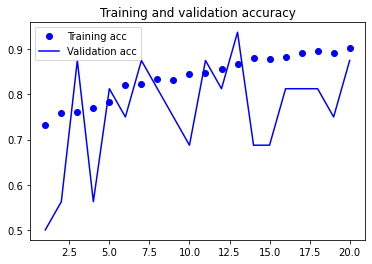

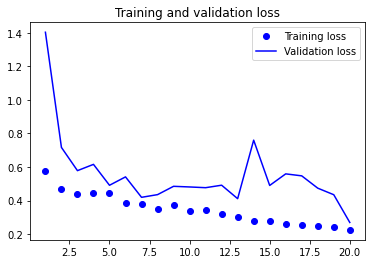

In [ ]:
accuracy = A_history.history['acc']
val_accuracy  = A_history.history['val_acc']

loss = A_history.history['loss']
val_loss = A_history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('Simple CNN .h5')
A_model.save('Augmentation CNN.h5')

### **Feture Extraction Using ResNet50V2**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255.,zoom_range = 0.2)
val_datagen = ImageDataGenerator(rescale = 1./255.,)
test_datagen = ImageDataGenerator(rescale = 1./255.,)
F_train_generator = train_datagen.flow_from_directory('/content/chest_xray/train', batch_size=20, class_mode='binary', target_size = (220, 220))
F_validation_generator = val_datagen.flow_from_directory('/content/chest_xray/val', batch_size=20, class_mode = 'binary', target_size=(220, 220))
F_test_generator = test_datagen.flow_from_directory('/content/chest_xray/test',shuffle=False, batch_size=20, class_mode = 'binary', target_size=(220, 220))

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# define the model
input_shape = (220, 220, 3)
base_model = tf.keras.applications.ResNet50V2(
    weights='imagenet', 
    input_shape=input_shape,
    include_top=False)
base_model.summary()

94683136/94668760 [==============================] - 1s 0us/step
Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 220, 220, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 226, 226, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 110, 110, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 112, 112, 64) 0           conv1_conv[0][0]                 
________________________

In [ ]:
for layer in base_model.layers:
    layer.trainable = False
    
    
F_model = Sequential()
F_model.add(base_model)
F_model.add(GlobalAveragePooling2D())
F_model.add(Dense(128, activation = 'relu'))
F_model.add(Dropout(0.2))
F_model.add(Dense(1, activation='sigmoid'))
F_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 23,827,201
Trainable params: 262,401
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
F_model.compile(optimizer="adam", 
              loss='binary_crossentropy', 
              metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

F_history = F_model.fit(F_train_generator, 
                    validation_data=F_validation_generator, 
                    steps_per_epoch = 100, 
                    epochs=30, 
                    callbacks=callback)

Epoch 1/30
100/100 [==============================] - 42s 390ms/step - loss: 0.1132 - accuracy: 0.9575 - val_loss: 0.2939 - val_accuracy: 0.8125
Epoch 2/30
100/100 [==============================] - 38s 384ms/step - loss: 0.1113 - accuracy: 0.9559 - val_loss: 0.2015 - val_accuracy: 0.8750
Epoch 3/30
100/100 [==============================] - 39s 388ms/step - loss: 0.1019 - accuracy: 0.9590 - val_loss: 0.1547 - val_accuracy: 0.9375
Epoch 4/30
100/100 [==============================] - 39s 387ms/step - loss: 0.1000 - accuracy: 0.9635 - val_loss: 0.3671 - val_accuracy: 0.6875
Epoch 5/30
100/100 [==============================] - 38s 378ms/step - loss: 0.1193 - accuracy: 0.9555 - val_loss: 0.4100 - val_accuracy: 0.7500
Epoch 6/30
100/100 [==============================] - 38s 383ms/step - loss: 0.0942 - accuracy: 0.9675 - val_loss: 0.3462 - val_accuracy: 0.8125
Epoch 7/30
100/100 [==============================] - 40s 397ms/step - loss: 0.0980 - accuracy: 0.9615 - val_loss: 0.7590 - val_ac

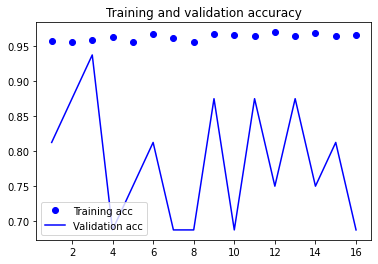

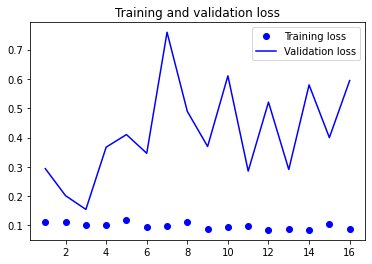

In [ ]:
import matplotlib.pyplot as plt
accuracy = F_history.history['accuracy']
val_accuracy  = F_history.history['val_accuracy']

loss = F_history.history['loss']
val_loss = F_history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## **Feture Extracition with Augmentation**

In [ ]:
# define the model
input_shape = (220, 220, 3)
FA_base_model = tf.keras.applications.ResNet50V2(
    weights='imagenet', 
    input_shape=input_shape,
    include_top=False)
FA_base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 220, 220, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 226, 226, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 110, 110, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 112, 112, 64) 0           conv1_conv[0][0]                 
_________________________________________________________________________________________

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
FA_train_generator = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                      target_size=(150, 150),
                                                      batch_size=16,
                                                      class_mode='binary')
FA_validation_generator = test_datagen.flow_from_directory('/content/chest_xray/val',
                                                          target_size=(150, 150),
                                                          batch_size=16,
                                                          class_mode='binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
for layer in FA_base_model.layers:
    layer.trainable = False
    
from keras import regularizers
FA_model = Sequential()
FA_model.add(FA_base_model)
FA_model.add(GlobalAveragePooling2D())
FA_model.add(Dense(128, activation = 'relu', kernel_regularizer=regularizers.l2(0.001)))
FA_model.add(Dropout(0.5))
FA_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
FA_model.add(Dropout(0.3))
FA_model.add(Dense(1, activation='sigmoid'))
FA_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_13  (None, 2048)              0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               262272    
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 16)                2064      
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 1)               

In [ ]:
FA_model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 
filepath="saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stop = EarlyStopping(monitor='val_accuracy', patience=4, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]



FA_history = FA_model.fit(FA_train_generator,
                          validation_data=FA_validation_generator, 
                          steps_per_epoch = 100, 
                          epochs=30, 
                          callbacks=callbacks_list)

Epoch 1/30
100/100 [==============================] - 28s 246ms/step - loss: 0.6499 - accuracy: 0.7975 - val_loss: 0.5783 - val_accuracy: 0.8750

Epoch 00001: val_accuracy improved from -inf to 0.87500, saving model to saved_models/weights-improvement-01-0.88.hdf5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/30
100/100 [==============================] - 23s 232ms/step - loss: 0.4561 - accuracy: 0.8606 - val_loss: 0.4889 - val_accuracy: 0.8750

Epoch 00002: val_accuracy did not improve from 0.87500
Epoch 3/30
100/100 [==============================] - 23s 231ms/step - loss: 0.4156 - accuracy: 0.8637 - val_loss: 0.5265 - val_accuracy: 0.8750

Epoch 00003: val_accuracy did not improve from 0.87500
Epoch 4/30
100/100 [==============================] - 23s 235ms/step - loss: 0.4020 - accuracy: 0.8725 - val_loss: 0.4625 - val_accuracy: 0.8125

Epoch 00004: val_accuracy did not improve from 0.87500
Epoch 5/30
100/100 [==============================] - 23s 234ms/step - loss: 0.3551 - accuracy: 0.9019 - val_loss: 0.4568 - val_accuracy: 0.9375

Epoch 00005: val_accuracy improved from 0.87500 to 0.93750, saving model to saved_models/weights-improvement-05-0.94.hdf5
Epoch 6/30
100/100 [==============================] - 23s 232ms/step - loss: 0.3750 - accuracy: 0.8831 - val_loss: 0.5841 - val_a

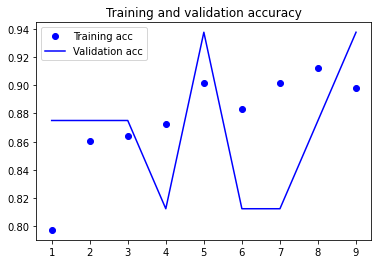

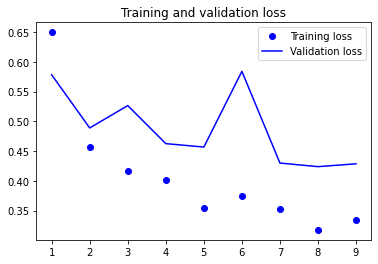

In [ ]:
import matplotlib.pyplot as plt
accuracy = FA_history.history['accuracy']
val_accuracy  = FA_history.history['val_accuracy']

loss = FA_history.history['loss']
val_loss = FA_history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## **Feture Exraction VGG19**

In [ ]:
from keras.applications.vgg19 import VGG19
conv_base = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from keras import models
from keras import layers
from keras import regularizers
V_model = models.Sequential()
V_model.add(conv_base)
V_model.add(layers.Flatten())
V_model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
V_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
V_model.add(Dropout(0.5))
V_model.add(layers.Dense(1, activation='sigmoid'))
V_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 65        
Total params: 21,081,409
Trainable params: 21,081,409
Non-trainable params: 0
_________________________________________

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
V_train_generator = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                      target_size=(150, 150),
                                                      batch_size=20,
                                                      class_mode='binary')
V_validation_generator = test_datagen.flow_from_directory('/content/chest_xray/val',
                                                          target_size=(150, 150),
                                                          batch_size=20,
                                                          class_mode='binary')

V_model.compile(loss='binary_crossentropy',
                optimizer=optimizers.RMSprop(lr=2e-5),
                metrics=['accuracy'])


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger

#ModelCheckpoint callback saves a model at some interval. 
filepath="saved_models/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5" #File name includes epoch and validation accuracy.
#Use Mode = max for accuracy and min for loss. 
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stop = EarlyStopping(monitor='val_accuracy', patience=4, verbose=1)
#This callback will stop the training when there is no improvement in
# the validation loss for three consecutive epochs.

#CSVLogger logs epoch, acc, loss, val_acc, val_loss
log_csv = CSVLogger('my_logs.csv', separator=',', append=False)

callbacks_list = [checkpoint, early_stop, log_csv]



V_history = V_model.fit(V_train_generator,
                          validation_data=V_validation_generator, 
                          steps_per_epoch = 100, 
                          epochs=30, 
                          callbacks=callbacks_list)

# V_history = V_model.fit(
#     V_train_generator,
#     steps_per_epoch=100,
#     epochs=30,
#     validation_data=V_validation_generator)

Epoch 1/30
100/100 [==============================] - 35s 333ms/step - loss: 0.7461 - accuracy: 0.7965 - val_loss: 0.7704 - val_accuracy: 0.7500

Epoch 00001: val_accuracy improved from -inf to 0.75000, saving model to saved_models/weights-improvement-01-0.75.hdf5
Epoch 2/30
100/100 [==============================] - 34s 339ms/step - loss: 0.5655 - accuracy: 0.8940 - val_loss: 1.0042 - val_accuracy: 0.7500

Epoch 00002: val_accuracy did not improve from 0.75000
Epoch 3/30
100/100 [==============================] - 33s 331ms/step - loss: 0.4913 - accuracy: 0.9140 - val_loss: 0.8105 - val_accuracy: 0.8125

Epoch 00003: val_accuracy improved from 0.75000 to 0.81250, saving model to saved_models/weights-improvement-03-0.81.hdf5
Epoch 4/30
100/100 [==============================] - 34s 334ms/step - loss: 0.4842 - accuracy: 0.9238 - val_loss: 0.8083 - val_accuracy: 0.7500

Epoch 00004: val_accuracy did not improve from 0.81250
Epoch 5/30
100/100 [==============================] - 34s 339ms/s

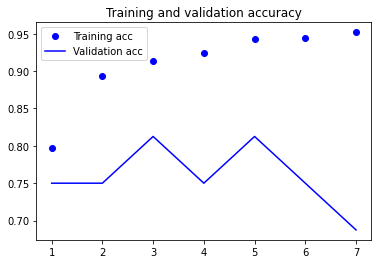

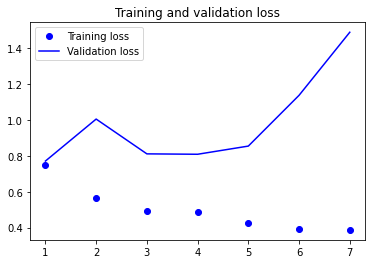

In [ ]:
import matplotlib.pyplot as plt
accuracy = V_history.history['accuracy']
val_accuracy  = V_history.history['val_accuracy']

loss = V_history.history['loss']
val_loss = V_history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## **Fine-Tuning Method**

In [ ]:
from keras.applications.vgg19 import VGG19
Fine_conv_base = VGG19(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3))

Fine_conv_base.trainable = True
set_trainable = False
for layer in Fine_conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
Fine_conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
from keras import models
from keras import layers
Fine_model = models.Sequential()
Fine_model.add(Fine_conv_base)
Fine_model.add(layers.Flatten())
Fine_model.add(layers.Dense(256, activation='relu'))
Fine_model.add(Dropout(0.5))
Fine_model.add(layers.Dense(1, activation='sigmoid'))
Fine_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 11,536,897
Non-trainable params: 10,585,152
_________________________________________________________________


In [ ]:
Fine_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
Fine_history = Fine_model.fit(
    V_train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=V_validation_generator )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
100/100 [==============================] - 31s 298ms/step - loss: 0.1689 - acc: 0.9319 - val_loss: 0.6955 - val_acc: 0.7500
Epoch 2/10
100/100 [==============================] - 30s 295ms/step - loss: 0.1226 - acc: 0.9580 - val_loss: 0.5096 - val_acc: 0.8125
Epoch 3/10
100/100 [==============================] - 30s 302ms/step - loss: 0.1206 - acc: 0.9545 - val_loss: 0.3359 - val_acc: 0.7500
Epoch 4/10
100/100 [==============================] - 30s 300ms/step - loss: 0.1274 - acc: 0.9540 - val_loss: 0.6239 - val_acc: 0.8125
Epoch 5/10
100/100 [==============================] - 30s 298ms/step - loss: 0.1132 - acc: 0.9590 - val_loss: 0.3220 - val_acc: 0.7500
Epoch 6/10
100/100 [==============================] - 30s 301ms/step - loss: 0.1198 - acc: 0.9540 - val_loss: 0.3891 - val_acc: 0.7500
Epoch 7/10
100/100 [==============================] - 30s 297ms/step - loss: 0.0994 - acc: 0.9650 - val_loss: 0.4110 - val_acc: 0.7500
Epoch 8/10
100/100 [==============================] - 3

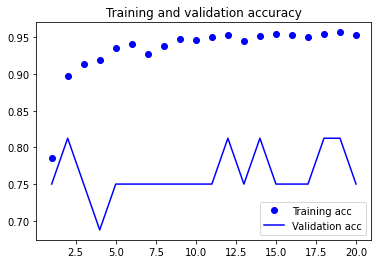

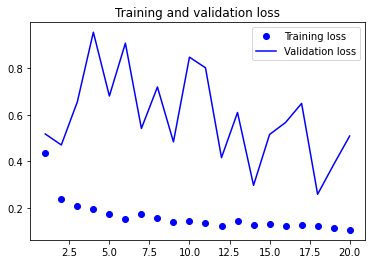

In [ ]:
import matplotlib.pyplot as plt
accuracy = Fine_history.history['acc']
val_accuracy  = Fine_history.history['val_acc']

loss = Fine_history.history['loss']
val_loss = Fine_history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
results = Fine_model.evaluate(x_test, y_test, batch_size=128)

{'acc': [0.7860721349716187,
  0.8970000147819519,
  0.913827657699585,
  0.9194999933242798,
  0.9353707432746887,
  0.9413827657699585,
  0.9279999732971191,
  0.9383767247200012,
  0.9473947882652283,
  0.9459999799728394,
  0.9498997926712036,
  0.953499972820282,
  0.9449999928474426,
  0.9514999985694885,
  0.9549098014831543,
  0.953499972820282,
  0.9504008293151855,
  0.9544088244438171,
  0.9570000171661377,
  0.9539077877998352],
 'loss': [0.4348682761192322,
  0.24018272757530212,
  0.20766335725784302,
  0.1956457495689392,
  0.17412585020065308,
  0.15316714346408844,
  0.17365744709968567,
  0.15789690613746643,
  0.14046138525009155,
  0.14362351596355438,
  0.13642553985118866,
  0.12267758697271347,
  0.1446659415960312,
  0.1265927106142044,
  0.131303608417511,
  0.12136495113372803,
  0.12623466551303864,
  0.12271338701248169,
  0.11503541469573975,
  0.10651234537363052],
 'val_acc': [0.75,
  0.8125,
  0.75,
  0.6875,
  0.75,
  0.75,
  0.75,
  0.75,
  0.75,
  0.7